# Time Series Anomaly Detection using Keras

## Fionn McCarthy - G00301126

<hr style="border-top: 1px solid #001a79;" />

## Introduction 
In this notebook I will run through the Keras Timeseries anomaly detection notebook https://github.com/keras-team/keras-io/blob/master/examples/timeseries/timeseries_anomaly_detection.py . I will explore the same concepts used in this notebok with the hope to give a more in-depth understanding of the topic and the terminologies and methods used in the notebook.   This jupyter notebook will look at how a reconstruction convolutional autoencoder model can be used in order to detect anomalies in timeseries data.

### Time Series Anomaly Detection
An anomaly is "something that deviates from what is standard, normal, or expected" https://www.merriam-webster.com/dictionary/anomaly. Anomalies within a time series dataset are the peaks/spikes or drops/troughs within the data, so we can say that anomaly detection is the process of highlighitng these anomalies in the dataset https://www.section.io/engineering-education/anomaly-detection-model-on-time-series-data-using-isolation-forest/#:~:text=Anomalies%20are%20spikes%20or%20drops,train%20a%20time%20series%20model. When forecasting on a dataset it is thses anomalies within the daatset that can cause issues or skew results when running forecasts on the data. 

Background...

### Machine Learning
Background to machine learning.. research

### Neural Networks
Background..

### Tensorflow and Keras
Background..



<hr style="border-top: 1px solid #001a79;" />

## The Dataset
As per the the documentation on the Keras website at https://keras.io/examples/timeseries/timeseries_anomaly_detection/ we will use the Numenta Anomaly Benchmark (NAB) dataset for the purpose of this analysis. One dataset will be used initially to train the model and then a second dataset will be used to evaluate and test our model, these datasets are the art_daily_small_noise.csv file and the art_daily_jumpsup.csv file respectively. 

The Numenta Anomaly Benchmark (NAB) is a unique gauge for evaluating algorithms for anomaly detection in for use in applications. There are over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. The data is all open-source and has a lot documentation to go with and has anotehr link to a github page which hosts information on a scoreboard of anomaly detection algorithms. This can be accessed at the following link github.com/numenta/NAB. This repository provides in-depth detail on evaluation of anomaly detection algorithsm with the Numenta Anomaly Benchmark.

Both datasets used in this notebook have been generated artificially, one with anomalies and one without anomalies. It is time series data and has two variables the timestamp and the value for that point in time. 


<br> 
<br>
<br>
<br>
<br>
<br>
<br>
<br>
 <br>

In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

#Layers of Neural Networks
from tensorflow.keras import layers 

# Plotting
import matplotlib.pyplot as plt

<hr style="border-top: 1px solid #001a79;" />

### Loading the Data

<hr style="border-top: 1px solid #001a79;" />

Accessing the data and then loading it for use in the notebook. 

Below is the url to access both the csv files online and full link to bring in both the datasets I will use in this notebook. 




In [2]:
# Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

# Data file without anomaly.
no_anomaly_url = root_url + 'artificialNoAnomaly/art_daily_small_noise.csv'

# Data file with anomaly.
with_anomaly_url = root_url + 'artificialWithAnomaly/art_daily_jumpsup.csv'

<hr style="border-top: 1px solid #001a79;" />

### Exploring the Data

<hr style="border-top: 1px solid #001a79;" />


In [3]:
# 
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [4]:
# 
df_small_noise.head()

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [5]:
# 
df_small_noise.describe()

,value
count,4032.000000
mean,42.438353
std,28.077122
min,18.000964
25%,19.841390
50%,21.608487
75%,75.450282
max,87.976128


In [6]:
# 
df_small_noise.iloc[0]

value    18.324919
Name: 2014-04-01 00:00:00, dtype: float64

In [7]:
# 
df_small_noise.iloc[0]['value']

18.3249185392

In [8]:
# 
df_small_noise.iloc[0].values[0]

18.3249185392

Visualize the data
Timeseries data without anomalies
We will use the following data for training.

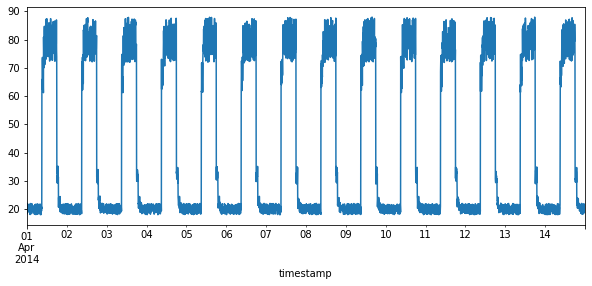

In [9]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

Timeseries data with anomalies
We will use the following data for testing and see if the sudden jump up in the data is detected as an anomaly.

In [10]:
#
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [11]:
# 
df_daily_jumpsup.head()

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


In [12]:

# 
df_daily_jumpsup.describe()

,value
count,4032.000000
mean,44.494254
std,32.432473
min,18.001010
25%,19.991382
50%,21.648503
75%,76.435943
max,164.947481


In [13]:
# 
df_daily_jumpsup.iloc[0]['value']

19.761251903

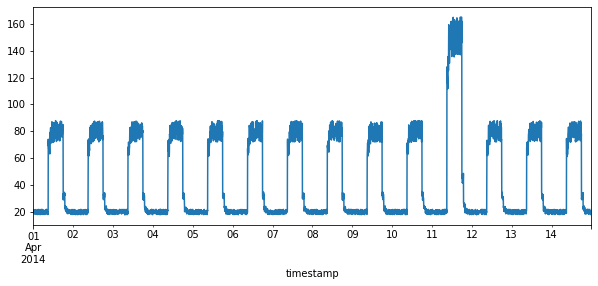

In [14]:
# 
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

<hr style="border-top: 1px solid #001a79;" />

### Pre-processing

<hr style="border-top: 1px solid #001a79;" />

Pre-pocessing is required in order to prepare the daat to be inserted into the neural network. I will first carry out some pre-processing task on the data in order to prepare the data for this analysis. This is essentially a data cleansing and processing technique used on data before we carry out machine learning techniques on the data. Most common techniques used in this area are standardising the data values or normalising the data values. Another way is by transsofmring the data. 

#### Normalising the data
We will first look at whether we should standardise or normalise the data values. In order to see which route we take we need to plot the data, having plotted the data above previous we have already carried out this part of the process. 

The distribution of this data will dictate whether to normalise or standardise the data https://becominghuman.ai/what-does-feature-scaling-mean-when-to-normalize-data-and-when-to-standardize-data-c3de654405ed. If the data follows a Gaussian distribution, which is bell-curved data when plotted then you would satndardise the data. As teh data does not follow this distribution we need to normalise the data. 

Normalising the data involves scaling the data, in order to achieve this we will get the mean and standard of the values and the following formula will give us our normaliused values: 

$$ Z = {x - \mu \over \sigma} $$

I will apply this to the values prior to moving to the next stage of the analysis. 

In [15]:
# gettign the mean of teh values
train_mean = df_small_noise.mean()

train_mean

value    42.438353
dtype: float64

In [16]:
# geting the standard deviation of the values
train_std = df_small_noise.std()

train_std

value    28.077122
dtype: float64

In [17]:
# normalising the values 
df_train_vals = (df_small_noise - train_mean) / train_std

# quick look at values outputted
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


With this technique complete we will do a quick check to see the mean is almost zero and that the standard deviation is near 1. 

In [18]:
# check mean
df_train_vals['value'].mean()

-2.616541242931684e-15

In [19]:
# check standard deviation
df_train_vals['value'].std()

1.0000000000000018

In [20]:
# 
df_small_noise['less_mean'] = df_small_noise['value'] - df_small_noise['value'].mean()
df_small_noise['div_std'] = df_small_noise['less_mean'] / df_small_noise['value'].std()

df_small_noise

,value,less_mean,div_std
timestamp,,,
2014-04-01 00:00:00,18.324919,-24.113435,-0.858829
2014-04-01 00:05:00,21.970327,-20.468026,-0.728993
2014-04-01 00:10:00,18.624806,-23.813547,-0.848148
2014-04-01 00:15:00,21.953684,-20.484669,-0.729586
2014-04-01 00:20:00,21.909120,-20.529234,-0.731173
...,...,...,...
2014-04-14 23:35:00,20.211195,-22.227159,-0.791647
2014-04-14 23:40:00,20.531041,-21.907313,-0.780255
2014-04-14 23:45:00,19.032127,-23.406226,-0.833640


In [21]:
df_small_noise['value'].mean(), df_small_noise['less_mean'].mean(), df_small_noise['div_std'].mean()

(42.438353335806646, -7.342627387941552e-14, -2.616541242931684e-15)

In [22]:
df_small_noise['value'].std(), df_small_noise['less_mean'].std(), df_small_noise['div_std'].std()

(28.077122281262515, 28.077122281262508, 1.0000000000000018)

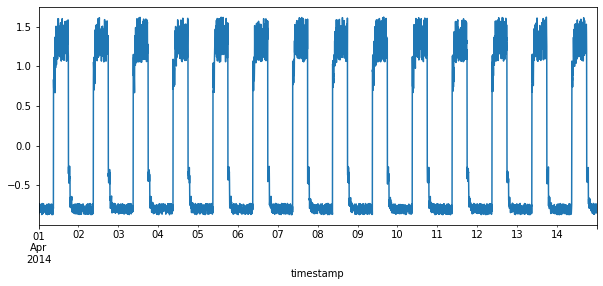

In [23]:
# defining our plot
fig, ax = plt.subplots(figsize=(10,4))

# Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [24]:
# Looking at dataset shape, number of values
df_train_vals.shape

(4032, 1)

#### Tranaforming the data
In thsi section we will look at ways to tarnsform the data, in the notebook they use the method of windows in order to do this or as tehy refer to 'time steps'. This involves paritioning the data into different subsections in order top slide teh window along the data to forecats the next section of the data. The method of utilising previous time steps to forecast the next time step in teh series https://machinelearningmastery.com/time-series-forecasting-supervised-learning/#:~:text=The%20use%20of%20prior%20time,or%20size%20of%20the%20lag. . 

In [25]:
# number os timesteps in the data or window size
window_size = 288

In [26]:
# Window list example.
L = [1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
# Example window size.
win_size = 3
# Length of L.
len(L)

12

In [27]:
# Number of windows from L.
len(L) - (win_size - 1)

10

In [28]:
# Remove brackets.
len(L) - win_size + 1

10

In [29]:
# Print the windows.
for i in range(len(L) - win_size + 1):
    print(L[i:i + win_size])

[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
[5, 6, 7]
[6, 7, 1]
[7, 1, 2]
[1, 2, 3]
[2, 3, 4]
[3, 4, 5]


In [30]:
# For accumulating the windows.
wins = []

# Generate the windows
for i in range(len(L) - win_size + 1):
    wins.append(L[i:i + win_size])

wins

[[1, 1, 2],
 [1, 2, 4],
 [2, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 1],
 [7, 1, 2],
 [1, 2, 3],
 [2, 3, 4],
 [3, 4, 5]]

In [31]:
# Create a 2D numpy array from wins.
np.stack(wins)

array([[1, 1, 2],
       [1, 2, 4],
       [2, 4, 5],
       [4, 5, 6],
       [5, 6, 7],
       [6, 7, 1],
       [7, 1, 2],
       [1, 2, 3],
       [2, 3, 4],
       [3, 4, 5]])

In [32]:
# widnows formula
def windows(vals, N=window_size):
  # set L to be an empty list
  L = []
  # loop through data
  for i in range(len(vals) - N + 1):
    # append to our list
    L.append(vals[i:i+N])
  # stack() is used to stack our values on top of one another
  return np.stack(L)

In [33]:
# this will assign our new values to x-train
x_train = windows(df_train_vals)
# 
x_train[0][0], x_train[-1][-1]

(array([-0.85882857]), array([-0.8460886]))

In [34]:
# 
df_train_vals.iloc[0], df_train_vals.iloc[-1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.846089
 Name: 2014-04-14 23:55:00, dtype: float64)

In [35]:
# 
x_train.shape

(3745, 288, 1)

In [36]:
#
df_train_vals['value'].values

array([-0.85882857, -0.72899302, -0.84814772, ..., -0.83364049,
       -0.73510213, -0.8460886 ])

In [37]:
# 
x_train[0].flatten()

array([-0.85882857, -0.72899302, -0.84814772, -0.72958579, -0.731173  ,
       -0.75730984, -0.77645641, -0.7880838 , -0.747012  , -0.829166  ,
       -0.80377285, -0.7821597 , -0.81182078, -0.80949918, -0.82334701,
       -0.79001779, -0.74922405, -0.84169024, -0.73727717, -0.77223023,
       -0.75311352, -0.79116337, -0.75934728, -0.86809294, -0.75381057,
       -0.86468256, -0.74361965, -0.72908121, -0.82850668, -0.84043795,
       -0.76136364, -0.8343536 , -0.74708881, -0.85574949, -0.85245676,
       -0.73090636, -0.77440264, -0.74974936, -0.82419543, -0.77402585,
       -0.78574242, -0.7844733 , -0.77316412, -0.78843253, -0.80927467,
       -0.83109167, -0.76090519, -0.83816509, -0.77176485, -0.83715923,
       -0.78131343, -0.76396862, -0.83924191, -0.86186112, -0.85174179,
       -0.78406773, -0.74938477, -0.86399047, -0.76581026, -0.82177506,
       -0.80222751, -0.73807119, -0.82310669, -0.80410682, -0.86845167,
       -0.85877599, -0.83356075, -0.86643297, -0.78045221, -0.80

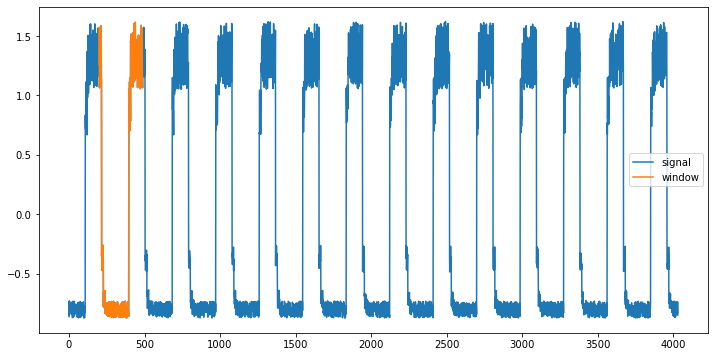

In [38]:
# 
window_no = 200

# 
fig, ax = plt.subplots(figsize=(12, 6))

# 
y = df_train_vals['value'].values

# 
ax.plot(np.arange(y.shape[0]), y, label='signal')

# The first window.
w = x_train[window_no].flatten()

# 
ax.plot(np.arange(w.shape[0]) + window_no, w, label='window')

ax.legend();

<hr style="border-top: 1px solid #001a79;" />
### Neural Network
<hr style="border-top: 1px solid #001a79;" />

In [39]:
x_train.shape

(3745, 288, 1)

In [40]:
#
layers = [
  #
  keras.layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  keras.layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Dropout(rate=0.2),
  #
  keras.layers.Conv1DTranspose(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  keras.layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]


#
model = keras.Sequential(layers)


# 
optimizer = keras.optimizers.Adam(learning_rate=0.001)


# 
model.compile(optimizer=optimizer, loss="mse")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 144, 32)           256       
                                                                 
 dropout (Dropout)           (None, 144, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 72, 16)            3600      
                                                                 
 conv1d_transpose (Conv1DTra  (None, 144, 16)          1808      
 nspose)                                                         
                                                                 
 dropout_1 (Dropout)         (None, 144, 16)           0         
                                                                 
 conv1d_transpose_1 (Conv1DT  (None, 288, 32)          3616      
 ranspose)                                              

In [41]:
# 
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)

Epoch 1/50
27/27 [==============================] - 3s 55ms/step - loss: 0.4936 - val_loss: 0.0718
Epoch 2/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0780 - val_loss: 0.0415
Epoch 3/50
27/27 [==============================] - 1s 42ms/step - loss: 0.0572 - val_loss: 0.0356
Epoch 4/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0482 - val_loss: 0.0294
Epoch 5/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0415 - val_loss: 0.0255
Epoch 6/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0366 - val_loss: 0.0234
Epoch 7/50
27/27 [==============================] - 1s 44ms/step - loss: 0.0331 - val_loss: 0.0220
Epoch 8/50
27/27 [==============================] - 1s 42ms/step - loss: 0.0303 - val_loss: 0.0209
Epoch 9/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0280 - val_loss: 0.0203
Epoch 10/50
27/27 [==============================] - 1s 43ms/step - loss: 0.0262 - val_loss: 0.0192
Epoch 11/

<hr style="border-top: 1px solid #001a79;" />
### Evaluation
<hr style="border-top: 1px solid #001a79;" />

In [42]:
history.history["loss"]

[0.49358925223350525,
 0.07797572761774063,
 0.05720032751560211,
 0.04820151999592781,
 0.04152875766158104,
 0.036569852381944656,
 0.03306616097688675,
 0.030270466580986977,
 0.0279559213668108,
 0.026204081252217293,
 0.02458026073873043,
 0.023241430521011353,
 0.02218678593635559,
 0.021090274676680565,
 0.02001057378947735]

In [43]:
history.history["val_loss"]

[0.07178898900747299,
 0.04148029908537865,
 0.03560318425297737,
 0.029374834150075912,
 0.025501586496829987,
 0.023382380604743958,
 0.02203025110065937,
 0.020895415917038918,
 0.020260773599147797,
 0.019174572080373764,
 0.019642392173409462,
 0.021747421473264694,
 0.02127785049378872,
 0.020867690443992615,
 0.021245727315545082]

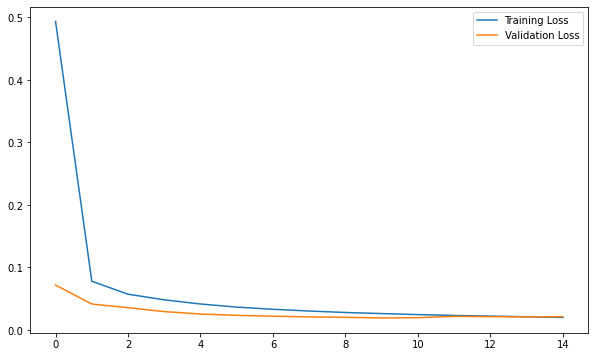

In [44]:
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.plot(history.history["loss"], label="Training Loss")
# 
ax.plot(history.history["val_loss"], label="Validation Loss")
# 
ax.legend();

In [45]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)

118/118 [==============================] - 1s 10ms/step


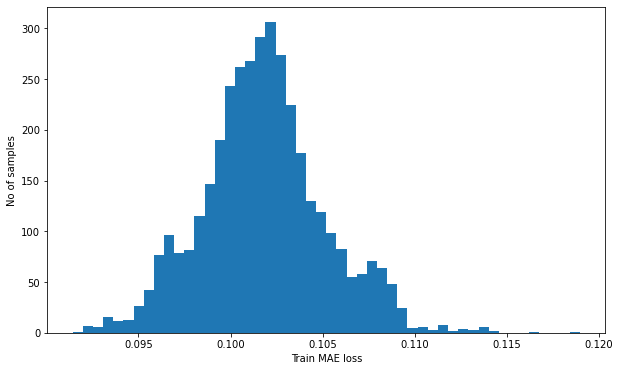

In [46]:
# Calculate loss...
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)
# 
fig, ax = plt.subplots(figsize=(10, 6))
# 
ax.hist(train_mae_loss, bins=50)
# 
ax.set_xlabel("Train MAE loss")
#
ax.set_ylabel("No of samples");

In [47]:
# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)

# 
threshold

0.11896377940013562

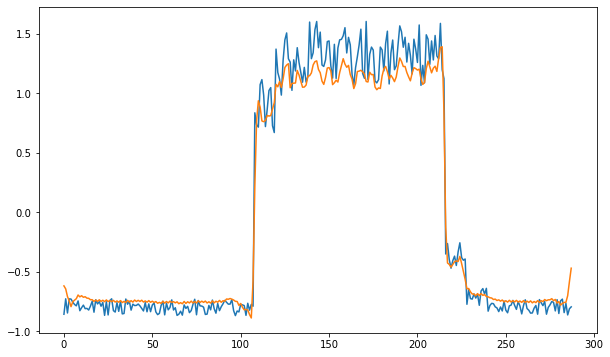

In [48]:

# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
ax.plot(x_train[0])

# 
ax.plot(x_train_pred[0]);

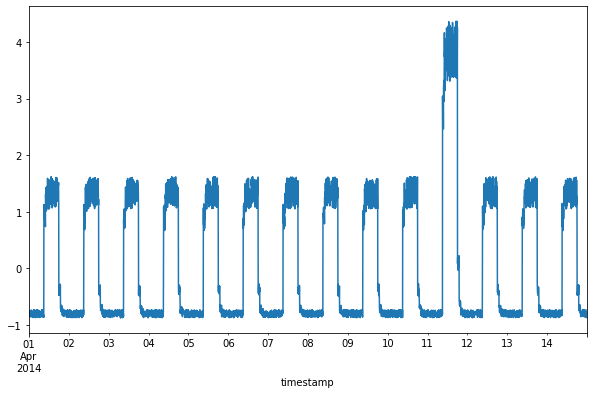

In [49]:
# 
df_test_value = (df_daily_jumpsup - train_mean) / train_std
# 
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_test_value.plot(legend=False, ax=ax);

In [50]:

# Create sequences from test values.
x_test = windows(df_test_value.values)

x_test.shape

(3745, 288, 1)

In [51]:
# 
x_test_pred = model.predict(x_test)

118/118 [==============================] - 1s 11ms/step


In [52]:
# 
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)

test_mae_loss

array([[0.10077694],
       [0.10250927],
       [0.10148511],
       ...,
       [0.1007885 ],
       [0.1033536 ],
       [0.10231942]])

In [53]:
# 
test_mae_loss = test_mae_loss.reshape((-1))

test_mae_loss

array([0.10077694, 0.10250927, 0.10148511, ..., 0.1007885 , 0.1033536 ,
       0.10231942])

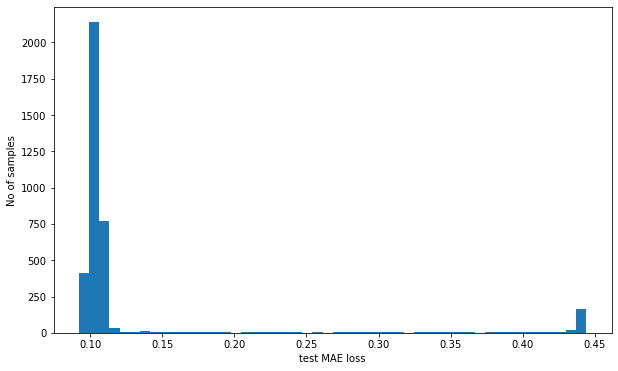

In [54]:
# 
fig, ax = plt.subplots(figsize=(10, 6))

#
ax.hist(test_mae_loss, bins=50)

# 
ax.set_xlabel("test MAE loss")

# 
ax.set_ylabel("No of samples");

In [55]:
# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold

# NUmber of anomalies.
np.sum(anomalies)

394

In [56]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
inds = []

for i in range(window_size - 1, len(df_test_value) - window_size + 1):
    if np.all(anomalies[i - window_size + 1 : i]):
        inds.append(i)

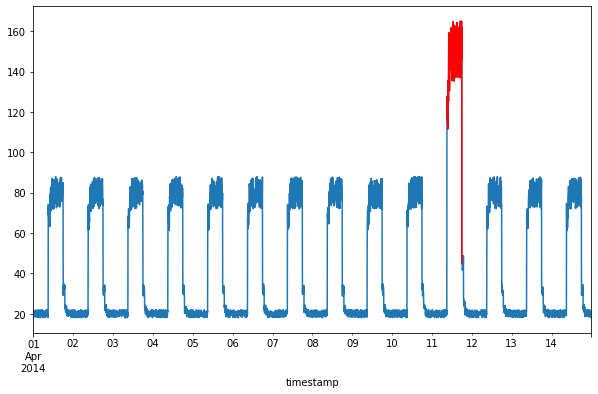

In [57]:
# 
df_subset = df_daily_jumpsup.iloc[inds]
#
fig, ax = plt.subplots(figsize=(10, 6))

# 
df_daily_jumpsup.plot(legend=False, ax=ax)

# 
df_subset.plot(legend=False, ax=ax, color="r");

## References
 1. https://www.kaggle.com/datasets/boltzmannbrain/nab 